<a href="https://colab.research.google.com/github/navendu10/MLmodels_NB/blob/main/RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.7673 - loss: 0.6843 - val_accuracy: 0.9575 - val_loss: 0.1361
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9646 - loss: 0.1147 - val_accuracy: 0.9732 - val_loss: 0.0894
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - accuracy: 0.9773 - loss: 0.0743 - val_accuracy: 0.9804 - val_loss: 0.0648
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9831 - loss: 0.0555 - val_accuracy: 0.9845 - val_loss: 0.0507
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9868 - loss: 0.0435 - val_accuracy: 0.9845 - val_loss: 0.0504
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.9889 - loss: 0.0380 - val_accuracy: 0.9827 - val_loss: 0.0537
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9904 - loss: 0.0339 - val_accuracy: 0.9864 - val_loss: 0.0428
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9915 -

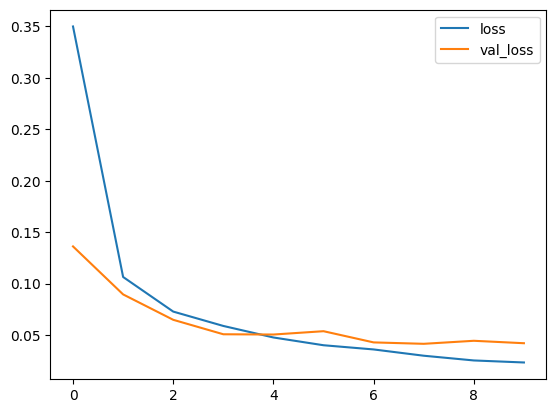

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

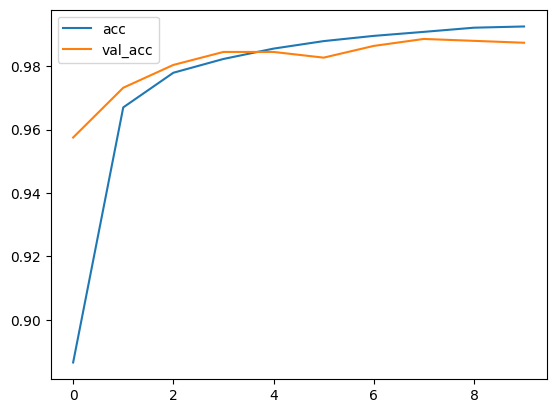

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step
Confusion matrix, without normalization
[[ 974    0    1    0    0    2    2    1    0    0]
 [   0 1132    0    1    0    0    0    2    0    0]
 [   0    2 1021    2    0    0    1    3    3    0]
 [   0    0    2  984    0   17    0    1    6    0]
 [   0    0    0    0  959    0    4    2    2   15]
 [   0    0    0    2    0  887    0    0    2    1]
 [   1    3    0    0    1   10  943    0    0    0]
 [   0    5    3    1    1    0    0 1013    1    4]
 [   0    0    1    1    0    3    0    1  966    2]
 [   0    0    0    3    3    2    0    4    2  995]]


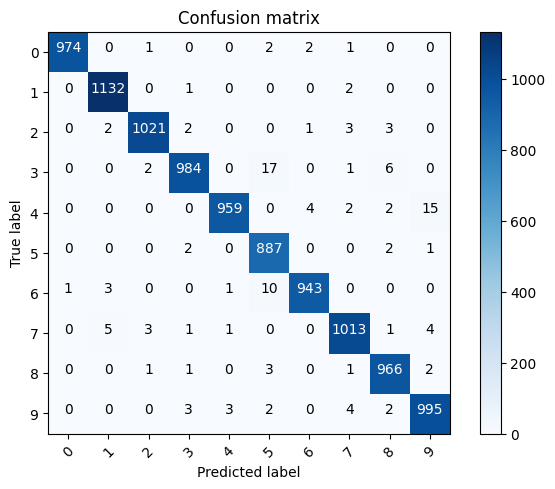

In [9]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

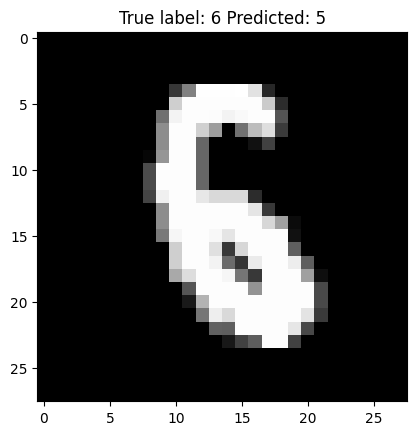

In [10]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));